<a href="https://colab.research.google.com/github/anamueller/IA/blob/main/Lista_de_Exerc%C3%ADcios_Pr%C3%A1ticos_5_(Agrupamento).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ibge = pd.read_csv("/content/drive/MyDrive/ibge_completo.csv")

#Exercício 3

In [ ]:
ibge.head()

,Município com acento,Regiao,População 2010,Urbana,Rural,Área totalKm2,Densidade demográficaHab./Km2,Postos_Vacinação
0,ADAMANTINA,RA de Presidente Prudente,33797,31948,1849,4114,8216,4
1,ADOLFO,RA de São José do Rio Preto,3557,3200,357,2111,1685,1
2,AGUAÍ,RA de Campinas,32148,29001,3147,4747,6772,5
3,ÁGUAS DA PRATA,RA de Campinas,7584,6771,813,1430,5305,1
4,ÁGUAS DE LINDÓIA,RA de Campinas,17266,17111,155,601,28716,4


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
escalado = ibge.iloc[:, 2:8].values

In [ ]:
escalado = min_max_scaler.fit_transform(escalado)

In [ ]:
escalado

array([[2.93191908e-03, 2.80862579e-03, 1.82781562e-02, 2.05882353e-01,
        6.26669447e-03, 4.25531915e-03],
       [2.44563570e-04, 2.30726802e-04, 3.52909776e-03, 1.04310345e-01,
        1.04831100e-03, 0.00000000e+00],
       [2.78537645e-03, 2.54436155e-03, 3.11094416e-02, 2.37981744e-01,
        5.11291316e-03, 5.67375887e-03],
       ...,
       [9.59805373e-03, 9.32878767e-03, 4.10245257e-02, 9.04158215e-02,
        4.70413579e-02, 2.26950355e-02],
       [7.45483439e-03, 7.32550871e-03, 2.34581204e-02, 2.12322515e-01,
        1.56575475e-02, 2.55319149e-02],
       [1.35967392e-04, 1.08413799e-04, 4.93282852e-03, 1.59077079e-01,
        2.86847293e-04, 0.00000000e+00]])

#Exercício 4a

In [ ]:
#colunas Área totalKm2 e Densidade demográficaHab./Km2
data = ibge.iloc[:, 5:7].values

In [ ]:
#normalizando as colunas que serão utilizadas
datascaled = min_max_scaler.fit_transform(data)

In [ ]:
#rodando kmeans com k=20
kmeans20 = KMeans(n_clusters=20, random_state=0).fit(datascaled)
re20 = kmeans20.labels_
hist,bin_edges = np.histogram(re20, range=(0, re20.max()), bins=re20.max() + 1)
print(hist)

[103  24   3  50   5   8  63   1   4  37  16   4 111   2  18  92   8   7
  40  49]


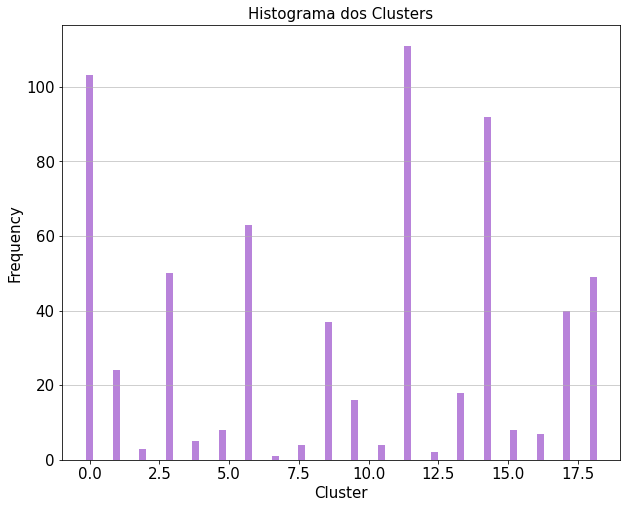

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])

plt.bar(bin_edges[:-1], hist, width = 0.25, color='#7209B7',alpha=0.5)
plt.xlim(min(bin_edges)-1, max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

In [ ]:
#rodando kmeans com k=50
kmeans50 = KMeans(n_clusters=50, random_state=0).fit(datascaled)
re50 = kmeans50.labels_
hist2,bin_edges2 = np.histogram(re50, range=(0, re50.max()), bins=re50.max() + 1)
print(hist2)

[28  7  3 19  5  1 46  2 18  1 13  3 30  4  2 13  4 25 13 33  5 46  4  1
 56  1  4 10 15  1  9  9  9  2  3 30 25  6  5 18 30  2  2  1  1  2 14 13
 18 33]


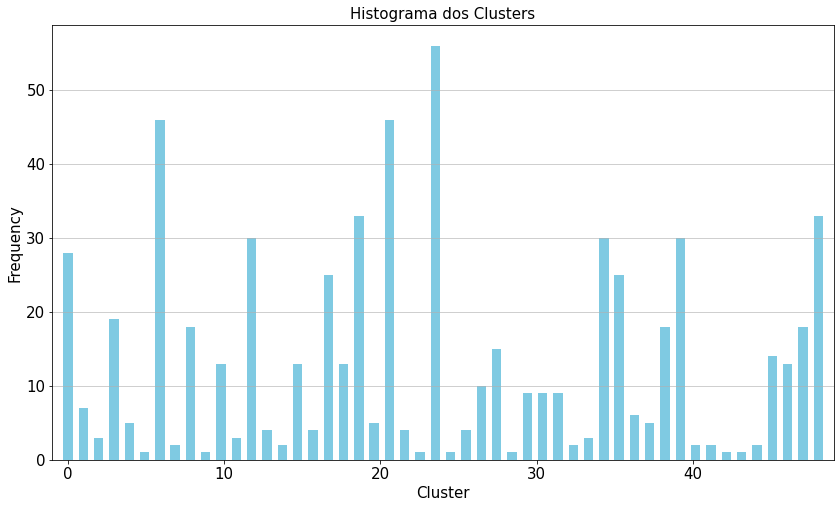

In [ ]:
plt.figure(figsize=[14,8])

plt.bar(bin_edges2[:-1], hist2, width = 0.6, color='#0096C7',alpha=0.5)
plt.xlim(min(bin_edges2)-1, max(bin_edges2))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

Pelos gráficos vemos que a diferença entre a quantidade de cidades em cada cluster diminui (temos uma variação menor) quando k=50, o que faz sentido pois com mais grupos disponíveis para separar as cidades teremos grupos mais específicos então as cidades estarão melhor distribuídas. Não há uma mudança muito grande porém perceptível.

In [ ]:
#rodando kmeans com k=200
kmeans100 = KMeans(n_clusters=200, random_state=0).fit(datascaled)
re100 = kmeans100.labels_
hist6,bin_edges6 = np.histogram(re100, range=(0, re100.max()), bins=re100.max() + 1)
print(hist6)

[ 5  4  1  1 10  1  2 11  1  1  2  3  1  1  1  4  9  1  3  2  1  1  3 12
  7  3  1  1  3  2  1 11  1  5  1  1 10  1  1  1  1  1  5  1  1  1  2  6
  1  1  1  1  2  1  2  3  1 12  2  2  3  2  1  7  2  2  3  3  1  1  1  1
  8  3  8  1  1  1  2  1  2  1  2  6  2  7  8 11  1  4  4  1  5  6  5  7
  3  2  3  5  1 11  2  2  1  1  4  2  3  9  8  1  1  1  4 12  2  3  1  3
  7  1  1  4  2  2  3  5  3  4  1  1  3  1  1  5  1  1  4  5  5  9  1  5
  1  1  3  2  1  2  3  6  1  3  5  1  2  1  1  7  8  1  1  3  6  1  2  6
  1  3  3  1  1  3 10  2 12  4  1  1  4  1  9  4  1  1  1  1 11  1  3  5
  1  9  3  3 10  3  1  1]


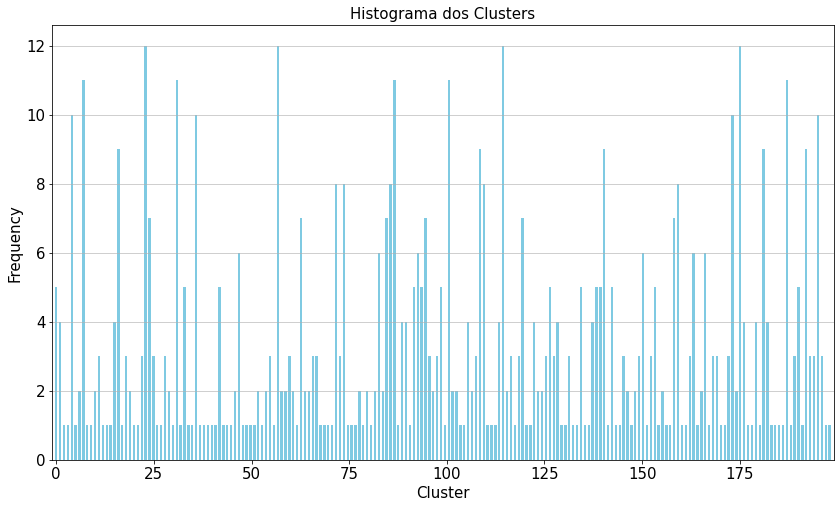

In [ ]:
plt.figure(figsize=[14,8])

plt.bar(bin_edges6[:-1], hist6, width = 0.6, color='#0096C7',alpha=0.5)
plt.xlim(min(bin_edges6)-1, max(bin_edges6))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

Como podemos ver no gráfico acima quando aumentamos muito o K (nesse caso = 200), começamos a ter clusters com quantidades mais próximas.

#Exercício 4b


In [ ]:
#utilizar o df escalado(possui os 6 atributos ja escalados)
#rodando kmeans com k=20
kmeans20_2 = KMeans(n_clusters=20, random_state=0).fit(escalado)
re20_2 = kmeans20_2.labels_
hist3,bin_edges3 = np.histogram(re20_2, range=(0, re20_2.max()), bins=re20_2.max() + 1)
print(hist3)

[ 58 137   8   5   1  27   8  53  50 127  12   4   1  20  18   1 102   3
   7   3]


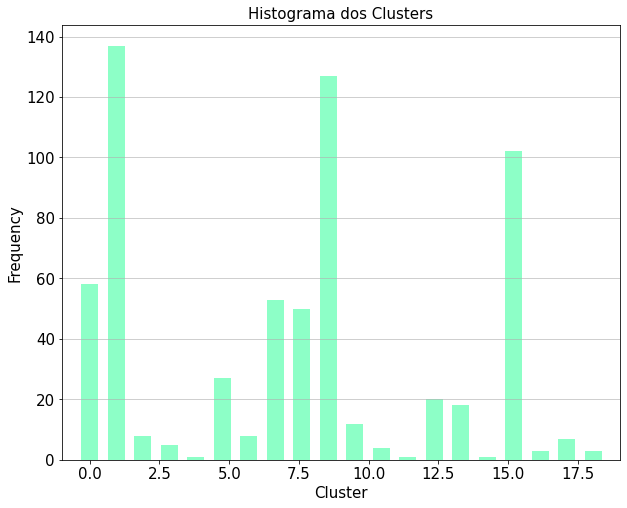

In [ ]:
plt.figure(figsize=[10,8])

plt.bar(bin_edges3[:-1], hist3, width = 0.6, color='#1cff91',alpha=0.5)
plt.xlim(min(bin_edges3)-1, max(bin_edges3))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

In [ ]:
#rodando kmeans com k=50
kmeans50_2 = KMeans(n_clusters=50, random_state=0).fit(escalado)
re50_2 = kmeans50_2.labels_
hist4,bin_edges4 = np.histogram(re50_2, range=(0, re50_2.max()), bins=re50_2.max() + 1)
print(hist4)

[50 16  1  6  1 33  1 19  2  3  9  2 73  1  5  1  2 12  1  2 14 10 15 24
  3 47  8 81  7  9  1  1 19  4  5  1 12 21  7  7  3  2  3  4 65  1  2  2
  5 22]


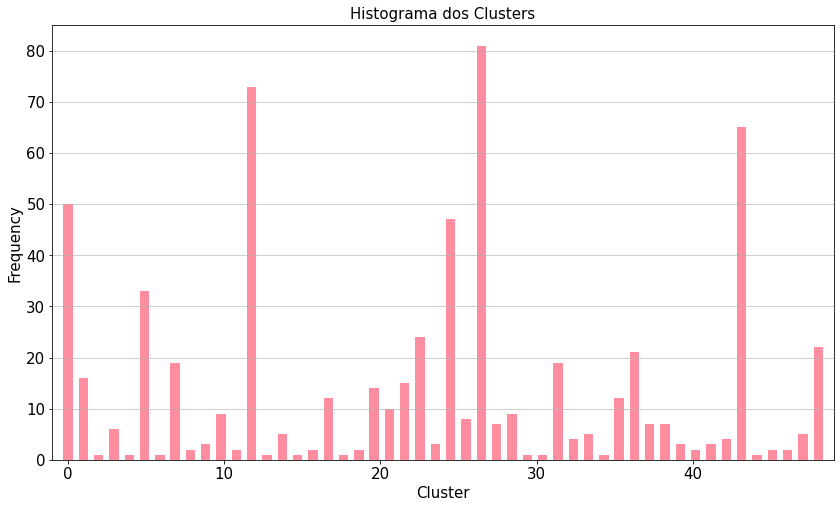

In [ ]:
plt.figure(figsize=[14,8])

plt.bar(bin_edges4[:-1], hist4, width = 0.6, color='#ff1c42',alpha=0.5)
plt.xlim(min(bin_edges4)-1, max(bin_edges4))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

Pelos gráficos vemos que a diferença entre a quantidade de cidades em cada cluster diminui (temos uma variação menor) quando k=50, o que faz sentido pois com mais grupos disponíveis para separar as cidades teremos grupos mais específicos então as cidades estarão melhor distribuídas. Não há uma mudança muito grande porém perceptível.

In [ ]:
#rodando kmeans com k=200
kmeans200_2 = KMeans(n_clusters=200, random_state=0).fit(escalado)
re200_2 = kmeans200_2.labels_
hist7,bin_edges7 = np.histogram(re200_2, range=(0, re200_2.max()), bins=re200_2.max() + 1)
print(hist7)

[22  3  1  1  4  2  1  1  5  6 31  1  3  1  2  1  6  1  3  2  4  1  1 10
  4  1  1  1  1  1  6  1  1  1  1  2  1 10  1  5  1  1  1  1  1  1  1  3
  2  1  1  1  1 13  1  4  2  4  1  1  1  3  1  4  1  2  1  2  3  7  1  1
 19  2  1  2  3  1  1  1  6  2  1  1  1  6  2  4  7 22  4  2  3  1 20  2
  1  4  1 18  4  2  1  4  2  1  1  1  1  1  1  2  1  6  1  1  2  1  8  1
  2  3  2  5  1  1 18  1  1  1  1  1  1  2  1  5  5  1  1  1  1 16  2  2
  2  1 24  1  2  1 13  4  3  1  1  1  8  5  2  1  1  1  8  1  7  2  4  1
  3  1  2  5  1  2  1  2  4  2  2  2  1  1  4  1  1  1  6  1  1  5  1  3
  4  8  1  4  2  1  1  1]


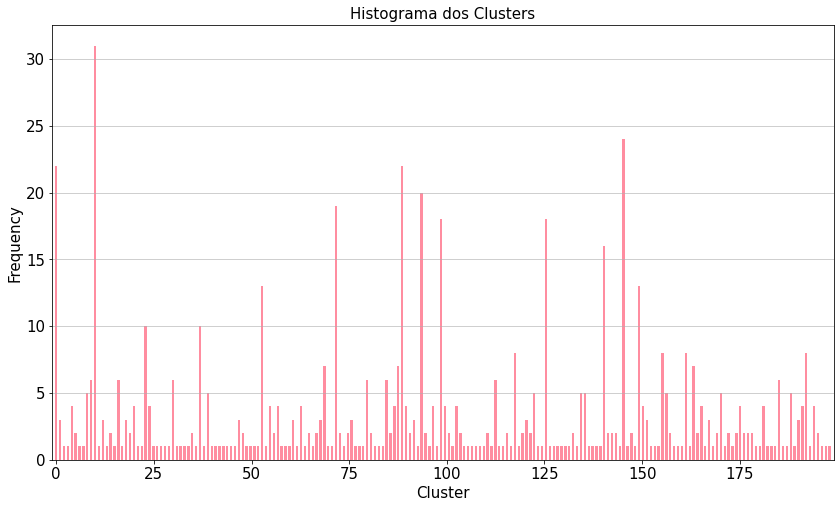

In [ ]:
plt.figure(figsize=[14,8])

plt.bar(bin_edges7[:-1], hist7, width = 0.6, color='#ff1c42',alpha=0.5)
plt.xlim(min(bin_edges7)-1, max(bin_edges7))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Frequencia',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histograma dos Clusters',fontsize=15)
plt.show()

Podemos ver que a diferença está diminuindo porém menos do que quando estávamos usando somente 2 atributos, logo a "rapidez" com que quando temos menos atributos será maior, algo que não foge muito do raciocínio lógica pois com mais atributos há mais coisas para se analisar e dividir em grupos logo para se assemelharem em quantidade precisariamos de mais grupos para cada vez mais diminuirmos as diferenças.

#Análise

Como podemos ver pelos gráficos abaixo a região da cidade não influencia em qual cluster a cidade estrá em nenhum das 4 simulações feita (com 2 atributos e k={20,50} e com 6 atributos e k={20,50}). Porém como vemos a densidade demográfica tem uma grande influência no cluster em qual a cidade se encontra em todas as 4 simulações feitas, podemos ver que uma pequena mudança de densidade demográfica faz com que a cidade esteja em um cluster diferente. Por exemplo como vemos com as cidades de Diadema, Taboão da Serra e Carapicuíba; Diadema e Taboão da Serra possuem uma diferença de aproximadamente 46 enquanto que Diadema e Carapicuíba possuem aproximadamente 183, uma diferença superior de 137, que é suficiente para fazer com que a cidade se encontre em um cluster diferente e relativamente distante (13 e 3 respectivamente). Isso acontece em todas na primeira simulação (com 2 atributos e k=20) porém na segunda simulação (com 2 atributos e k=50) a tolerância parece diminuir pois Carapicuíba, Osasco e São Caetano do Sul estão no mesmo cluster na primeria simulação e São Caetao do Sul não se encontra no mesmo cluster do que das outras cidades na segunda simulação (com uma grande diferença sendo as duas cidades no cluster 33 e São Caetano do Sul no cluster 5). Na terceira simulação (com 6 atributos e k=20) a tolerância de diferença parece aumentar pois todas as 5 cidades se encontram no mesmo cluster. Na quarta simulação (com 6 atributos e k=50) ocorre o mesmo que tinha acontecido na segunda simulção e novamente com uma grande diferença (41 e 4). Essa diferença na segunda e quarta simulação pode ocorrer devido ao aumento do K, pois como teremos mais cluster pode-se "filtrar" mais as cidades. A situação da terceira simulação pode ser por causa do aumento de atributos e com um K menor, ou seja temos mais coisas para dividir as cidades e menos grupos logo será mais fácil cidades com características similares se encontrarem no mesmo grupo, ao aumentarmos esse grupo temos a situação da quarta simulação.

In [ ]:
ibge.sort_values('Densidade demográficaHab./Km2', ascending=False)

,Município com acento,Regiao,População 2010,Urbana,Rural,Área totalKm2,Densidade demográficaHab./Km2,Postos_Vacinação
153,DIADEMA,RM de São Paulo,386089,386089,0,308,1251910,25
590,TABOÃO DA SERRA,RM de São Paulo,244528,244528,0,203,1204990,21
121,CARAPICUÍBA,RM de São Paulo,369584,369584,0,346,1068010,17
389,OSASCO,RM de São Paulo,666740,666740,0,640,1041180,61
547,SÃO CAETANO DO SUL,RM de São Paulo,149263,149263,0,154,970879,21
...,...,...,...,...,...,...,...,...
372,NOVA CASTILHO,RA de Araçatuba,1125,746,379,1832,614,1
539,SANTO ANTÔNIO DO ARACANGUÁ,RA de Araçatuba,7626,5971,1655,13082,583,3
316,LUTÉCIA,RA de Marília,2714,2158,556,4749,571,1
324,MARABÁ PAULISTA,RA de Presidente Prudente,4812,2142,2670,9177,524,4


In [ ]:
#Selecionando cidades que serão analisadas (cidades próximas uma das outras)
cps = np.where( (ibge['Município com acento'] == 'CAMPINAS').values==True)[0]
pira = np.where( (ibge['Município com acento'] == 'PIRACICABA').values==True)[0]
inda = np.where( (ibge['Município com acento'] == 'INDAIATUBA').values==True)[0]

#Cidades com populações próximas de Campinas (1.08 Milhões)
dia = np.where( (ibge['Município com acento'] == 'DIADEMA').values==True)[0]
ts = np.where( (ibge['Município com acento'] == 'TABOÃO DA SERRA').values==True)[0]
car = np.where( (ibge['Município com acento'] == 'CARAPICUÍBA').values==True)[0]
os = np.where( (ibge['Município com acento'] == 'OSASCO').values==True)[0]
ss = np.where( (ibge['Município com acento'] == 'SÃO CAETANO DO SUL').values==True)[0]

In [ ]:
print("Cidades de mesma região;")
cluster_cps1 = kmeans20.labels_[cps]
print("Campinas (2 atributos com k=20):", cluster_cps1[0])
cluster_cps2 = kmeans50.labels_[cps]
print("Campinas (2 atributos com k=50):", cluster_cps2[0])
cluster_cps3 = kmeans20_2.labels_[cps]
print("Campinas (6 atributos com k=20):", cluster_cps3[0])
cluster_cps4 = kmeans50_2.labels_[cps]
print("Campinas (6 atributos com k=50):", cluster_cps4[0])
cluster_pira1 = kmeans20.labels_[pira]
print("Piracicaba (2 atributos com k=20):", cluster_pira1[0])
cluster_pira2 = kmeans50.labels_[pira]
print("Piracicaba (2 atributos com k=50):", cluster_pira2[0])
cluster_pira3 = kmeans20_2.labels_[pira]
print("Piracicaba (6 atributos com k=20):", cluster_pira3[0])
cluster_pira4 = kmeans50_2.labels_[pira]
print("Piracicaba (6 atributos com k=50):", cluster_pira4[0])
cluster_inda1 = kmeans20.labels_[inda]
print("Indaiatuba (2 atributos com k=20):", cluster_inda1[0])
cluster_inda2 = kmeans50.labels_[inda]
print("Indaiatuba (2 atributos com k=50):", cluster_inda2[0])
cluster_inda3 = kmeans20_2.labels_[inda]
print("Indaiatuba (6 atributos com k=20):", cluster_inda3[0])
cluster_inda4 = kmeans50_2.labels_[inda]
print("Indaiatuba (6 atributos com k=50):", cluster_inda4[0])
pos20 = [cluster_cps1[0], cluster_pira1[0], cluster_inda1[0]]
pos50 = [cluster_cps2[0], cluster_pira2[0], cluster_inda2[0]]
pos20_2 = [cluster_cps3[0], cluster_pira3[0], cluster_inda3[0]]
pos50_2 = [cluster_cps4[0], cluster_pira4[0], cluster_inda4[0]]
cidades2 = ['Campinas', 'Piracicaba', 'Indaiatuba']

Cidades de mesma região;
Campinas (2 atributos com k=20): 9
Campinas (2 atributos com k=50): 23
Campinas (6 atributos com k=20): 17
Campinas (6 atributos com k=50): 30
Piracicaba (2 atributos com k=20): 17
Piracicaba (2 atributos com k=50): 16
Piracicaba (6 atributos com k=20): 14
Piracicaba (6 atributos com k=50): 31
Indaiatuba (2 atributos com k=20): 15
Indaiatuba (2 atributos com k=50): 37
Indaiatuba (6 atributos com k=20): 16
Indaiatuba (6 atributos com k=50): 48


In [ ]:
print('Cidades com densidades demográficas próximas;')
cluster_dia1 = kmeans20.labels_[dia]
print("Diadema (2 atributos com k=20):", cluster_dia1[0])
cluster_dia2 = kmeans50.labels_[dia]
print("Diadema (2 atributos com k=50):", cluster_dia2[0])
cluster_dia3 = kmeans20_2.labels_[dia]
print("Diadema (6 atributos com k=20):", cluster_dia3[0])
cluster_dia4 = kmeans50_2.labels_[dia]
print("Diadema (6 atributos com k=50):", cluster_dia4[0])
cluster_ts1 = kmeans20.labels_[ts]
print("Taboão da Serra (2 atributos com k=20):", cluster_ts1[0])
cluster_ts2 = kmeans50.labels_[ts]
print("Taboão da Serra (2 atributos com k=50):", cluster_ts2[0])
cluster_ts3 = kmeans20_2.labels_[ts]
print("Taboão da Serra (6 atributos com k=20):", cluster_ts3[0])
cluster_ts4 = kmeans50_2.labels_[ts]
print("Taboão da Serra (6 atributos com k=50):", cluster_ts4[0])
cluster_car1 = kmeans20.labels_[car]
print("Carapicuíba (2 atributos com k=20):", cluster_car1[0])
cluster_car2 = kmeans50.labels_[car]
print("Carapicuíba (2 atributos com k=50):", cluster_car2[0])
cluster_car3 = kmeans20_2.labels_[car]
print("Carapicuíba (6 atributos com k=20):", cluster_car3[0])
cluster_car4 = kmeans50_2.labels_[car]
print("Carapicuíba (6 atributos com k=50):", cluster_car4[0])
cluster_os1 = kmeans20.labels_[os]
print("Osasco (2 atributos com k=20):", cluster_os1[0])
cluster_os2 = kmeans50.labels_[os]
print("Osasco (2 atributos com k=50):", cluster_os2[0])
cluster_os3 = kmeans20_2.labels_[os]
print("Osasco (6 atributos com k=20):", cluster_os3[0])
cluster_os4 = kmeans50_2.labels_[os]
print("Osasco (6 atributos com k=50):", cluster_os4[0])
cluster_ss1 = kmeans20.labels_[ss]
print("São Caetano do Sul (2 atributos com k=20):", cluster_ss1[0])
cluster_ss2 = kmeans50.labels_[ss]
print("São Caetano do Sul (2 atributos com k=50):", cluster_ss2[0])
cluster_ss3 = kmeans20_2.labels_[ss]
print("São Caetano do Sul (6 atributos com k=20):", cluster_ss3[0])
cluster_ss4 = kmeans50_2.labels_[ss]
print("São Caetano do Sul (6 atributos com k=50):", cluster_ss4[0])
posk20 = [cluster_dia1[0], cluster_ts1[0], cluster_car1[0], cluster_os1[0], cluster_ss1[0]]
posk50 = [cluster_dia2[0], cluster_ts2[0], cluster_car2[0], cluster_os2[0], cluster_ss2[0]]
posk20_2 = [cluster_dia3[0], cluster_ts3[0], cluster_car3[0], cluster_os3[0], cluster_ss3[0]]
posk50_2 = [cluster_dia4[0], cluster_ts4[0], cluster_car4[0], cluster_os4[0], cluster_ss4[0]]
cidades = ['Diadema', 'Taboão da Serra', 'Carapicuíba', 'Osasco', 'São Caetano do Sul']

Cidades com densidades demográficas próximas;
Diadema (2 atributos com k=20): 13
Diadema (2 atributos com k=50): 14
Diadema (6 atributos com k=20): 3
Diadema (6 atributos com k=50): 19
Taboão da Serra (2 atributos com k=20): 13
Taboão da Serra (2 atributos com k=50): 14
Taboão da Serra (6 atributos com k=20): 3
Taboão da Serra (6 atributos com k=50): 19
Carapicuíba (2 atributos com k=20): 2
Carapicuíba (2 atributos com k=50): 33
Carapicuíba (6 atributos com k=20): 3
Carapicuíba (6 atributos com k=50): 41
Osasco (2 atributos com k=20): 2
Osasco (2 atributos com k=50): 33
Osasco (6 atributos com k=20): 3
Osasco (6 atributos com k=50): 41
São Caetano do Sul (2 atributos com k=20): 2
São Caetano do Sul (2 atributos com k=50): 5
São Caetano do Sul (6 atributos com k=20): 3
São Caetano do Sul (6 atributos com k=50): 4


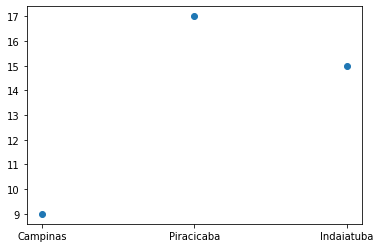

In [ ]:
import matplotlib.pyplot as plt
#Cluster de cidades da mesma região quando utilizamos 2 atributos e k=20
plt.scatter(cidades2, pos20)
plt.show()

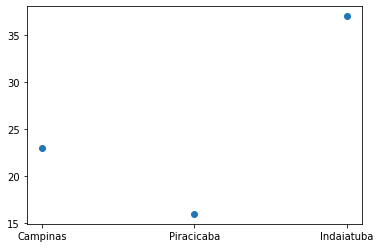

In [ ]:
#Cluster de cidades da mesma região quando utilizamos 2 atributos e k=50
plt.scatter(cidades2, pos50)
plt.show()

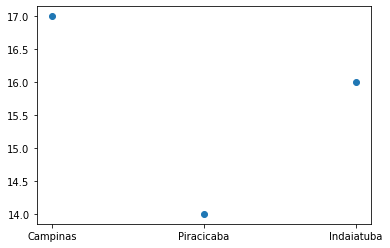

In [ ]:
#Cluster de cidades da mesma região quando utilizamos 6 atributos e k=20
plt.scatter(cidades2, pos20_2)
plt.show()

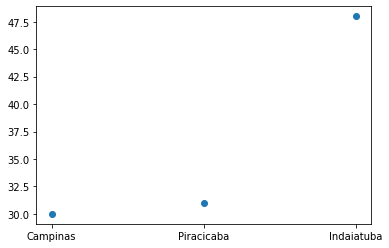

In [ ]:
#Cluster de cidades da mesma região quando utilizamos 6 atributos e k=50
plt.scatter(cidades2, pos50_2)
plt.show()

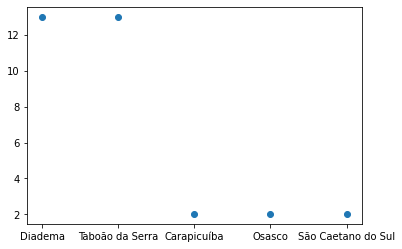

In [ ]:
#Cluster de cidades com populações próximas quando utilizamos 2 atributos e k=20
plt.scatter(cidades, posk20)
plt.show()

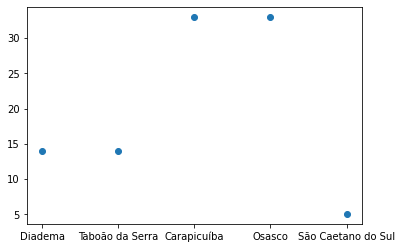

In [ ]:
#Cluster de cidades com populações próximas quando utilizamos 2 atributos e k=50
plt.scatter(cidades, posk50)
plt.show()

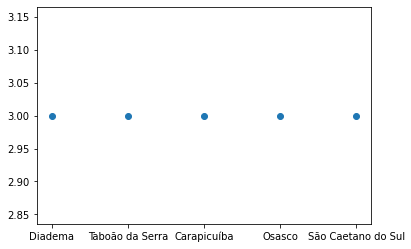

In [ ]:
#Cluster de cidades com populações próximas quando utilizamos 6 atributos e k=20
plt.scatter(cidades, posk20_2)
plt.show()

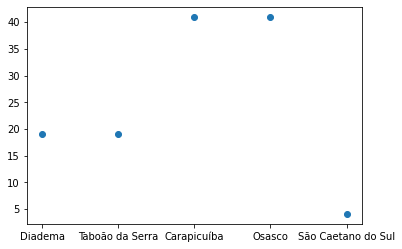

In [ ]:
#Cluster de cidades com populações próximas quando utilizamos 6 atributos e k=50
plt.scatter(cidades, posk50_2)
plt.show()